# 1.0 Introduction

Today we are going to analyse the medical insurance plan. Health and medical insurance covers what minor and major medical issues or emergencies.Insurance rates can be different based on the type of plan, age, job, family health history, health problems, and other factors. Hence, finding the right insurance plan based on insured requirements is crucial to strengthen customer relationships, customise health insurance products, and decrease insurer risk.

### 1.1  Problem Statement
- to evaluate the pricing of insurance plans based on health condition of individuals
- to study how physical conditions of individuals relates to health issues 

### 1.2 Objectives
- help the insurer to improve their policy pricing accuracy 
- identify the factors impacting the insurance price based on the data collected from the individuals

<a id="python"></a>

<img src="https://themighty.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-27-at-2.54.06-PM.png" style="width:450px;height:300px;">

# 2.0 Data Gathering and Preparation

1) Importing libraries

In [4]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
sns.set(rc={"figure.figsize": (6, 4)})
%matplotlib inline
import math
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

### 2.1 Sources of Data

2) Read in the Medical Insurance Premium Prediction dataset

In [5]:
df = pd.read_csv("Medicalpremium.csv")

### 2.2 Data wrangling steps

3) The first 10 rows

In [6]:
df.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


4) Number of rows and columns

In [7]:
df.shape

(986, 11)

5) Data types

In [8]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

6) Data info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


7) Presence of null values

In [10]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

8. Presence of non-arthemetic values

In [11]:
df.isnull().any()

Age                        False
Diabetes                   False
BloodPressureProblems      False
AnyTransplants             False
AnyChronicDiseases         False
Height                     False
Weight                     False
KnownAllergies             False
HistoryOfCancerInFamily    False
NumberOfMajorSurgeries     False
PremiumPrice               False
dtype: bool

9. Adding new column for BMI

    Formula:
<a id="python"></a>

<img src="https://www.nursingcenter.com/getattachment/NCBlog/August-2017/Body-Mass-Index-and-Body-Surface-Area-What-s-the-D/BMI-calculation.jpg.aspx" style="width:150px;height:150px;">

In [12]:
# merged['total_cost'] = merged['unit_cost']*merged['quantity']
bmi = df['Weight']/((df['Height']/100)**2)
bmi = round(bmi,1)
df['BMI']=bmi

9. Adding another column for BMI status
![image.png](attachment:image.png)

                    Image source :https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi-m.htm

In [13]:
def BMI_Status(bmi):
    if bmi <= 18.4:
        return 'Underweight'
    elif bmi <= 24.9:
        return 'Normal'
    elif bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'


In [14]:
#checking the function
BMI_Status(23.7)

'Normal'

Saving the new function in a new column

In [15]:
df['BMI'].apply(BMI_Status)

0          Normal
1          Normal
2          Normal
3      Overweight
4           Obese
          ...    
981        Normal
982    Overweight
983    Overweight
984    Overweight
985         Obese
Name: BMI, Length: 986, dtype: object

In [16]:
df['BMI_Status']=df['BMI'].apply(BMI_Status)

In [17]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,23.7,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.5,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.6,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.8,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.9,Obese


Now let's update the dataset!

In [18]:
df.to_csv("Updated_Medicalpremium.csv", index=False)

In [19]:
df = pd.read_csv("Updated_Medicalpremium.csv")
df.head(18)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,23.7,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.5,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.6,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.8,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.9,Obese
5,30,0,0,0,0,160,69,1,0,1,23000,27.0,Overweight
6,33,0,0,0,0,150,54,0,0,0,21000,24.0,Normal
7,23,0,0,0,0,181,79,1,0,0,15000,24.1,Normal
8,48,1,0,0,0,169,74,1,0,0,23000,25.9,Overweight
9,38,0,0,0,0,182,93,0,0,0,23000,28.1,Overweight


# 3.0 Exploratory Data Analysis (EDA)

### 3.1 Basic descriptive statistics and visualizations

1. Basic descriptive statistics

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [21]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'BMI_Status'],
      dtype='object')

2. Creating histograms to visualize datasets

In [22]:
df.sort_values('Age').head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status
476,18,0,0,0,0,181,65,1,1,1,15000,19.8,Normal
795,18,0,0,0,0,148,75,1,0,0,15000,34.2,Obese
722,18,0,0,0,0,172,71,0,0,0,15000,24.0,Normal
822,18,0,1,0,0,163,82,0,0,0,15000,30.9,Obese
580,18,0,0,0,0,172,79,0,0,0,15000,26.7,Overweight


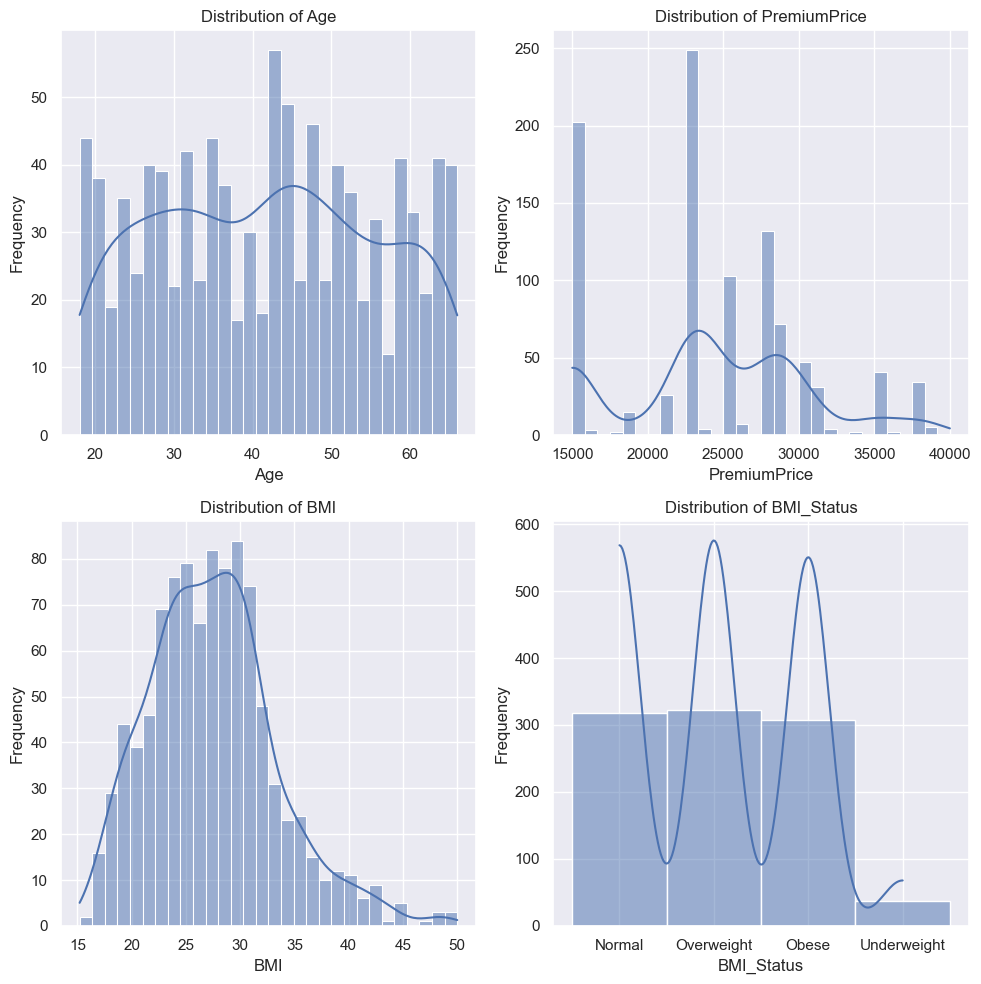

In [23]:
columns_ = ['Age', 'PremiumPrice', 'BMI', 'BMI_Status']
rows = 2
plt.figure(figsize = (10,10))
for i, column in enumerate(columns_, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df , x=column, bins =30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

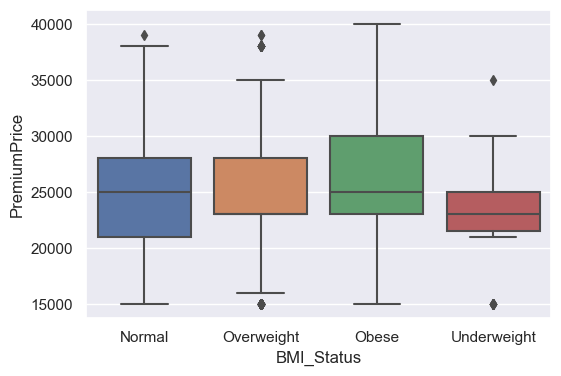

In [24]:
ax = sns.boxplot(x='BMI_Status', y='PremiumPrice', data=df)

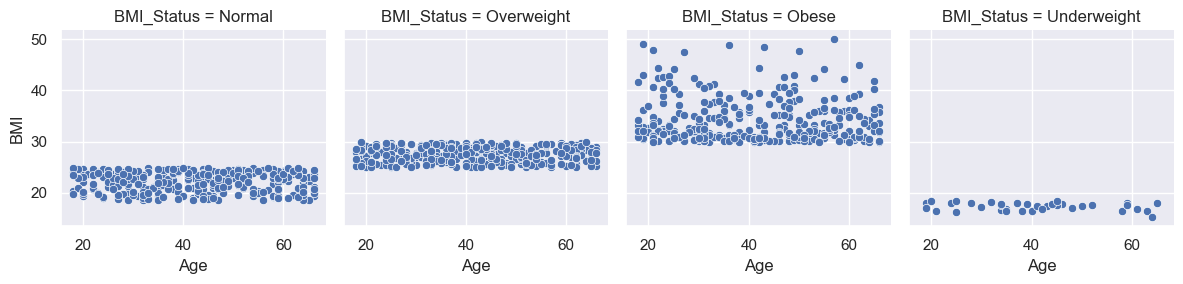

In [25]:
ax = sns.FacetGrid(df, col = 'BMI_Status')
ax.map(sns.scatterplot, 'Age', 'BMI')
ax.set
plt.show()

<a id="obese"></a>

[Text(0.5, 1.0, 'BMI Vs Premium Price')]

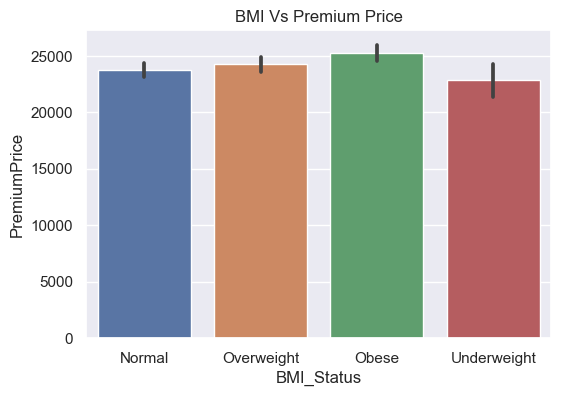

In [26]:
sns.barplot(x='BMI_Status',y='PremiumPrice',data = df).set(title='BMI Vs Premium Price')

<a id="Transplants"></a>

[Text(0.5, 1.0, 'Transplants Vs Premium Price')]

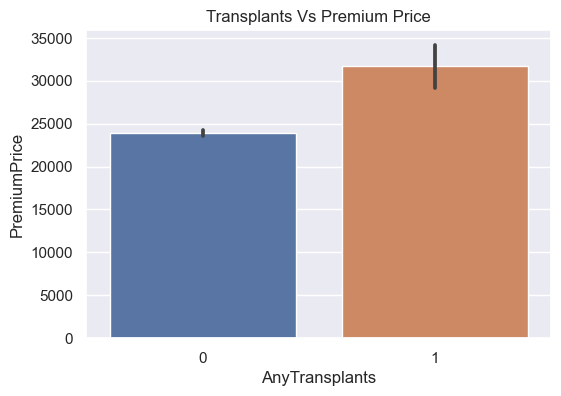

In [27]:
sns.barplot(x='AnyTransplants',y='PremiumPrice',data = df).set(title='Transplants Vs Premium Price')

<a id="diabetes"></a>

[Text(0.5, 1.0, 'Diabetes Vs Age')]

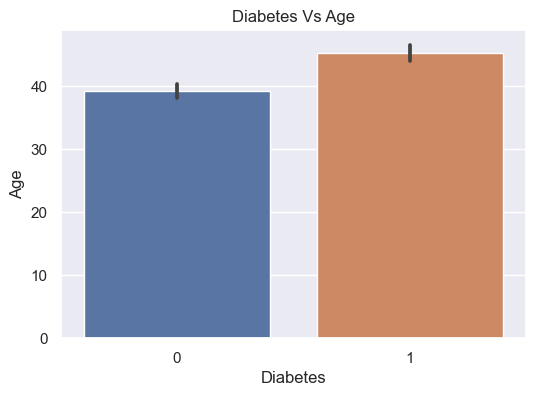

In [28]:
sns.barplot(x='Diabetes',y='Age',data = df).set(title='Diabetes Vs Age')

<a id="bp"></a>

[Text(0.5, 1.0, 'Blood Pressure Vs Age')]

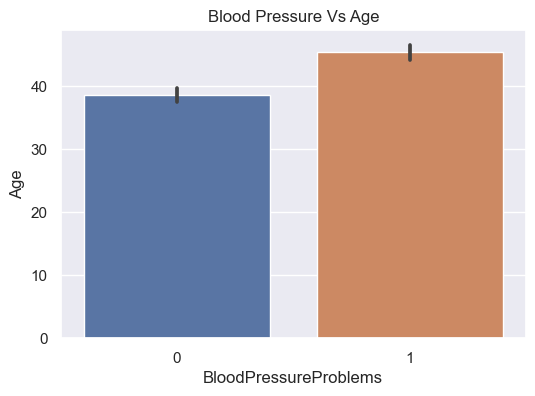

In [29]:
sns.barplot(x='BloodPressureProblems',y='Age',data = df).set(title='Blood Pressure Vs Age')

3. Showing Correlation

In [30]:
corr_mat = df.corr(numeric_only =True)
corr_mat

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540,-0.041960
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209,-0.022890
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097,-0.038057
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056,0.023386
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610,-0.056801
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910,-0.504560
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507,0.820904
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103,0.040275
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139,0.002322
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250,-0.027336


4. Creating heatmap

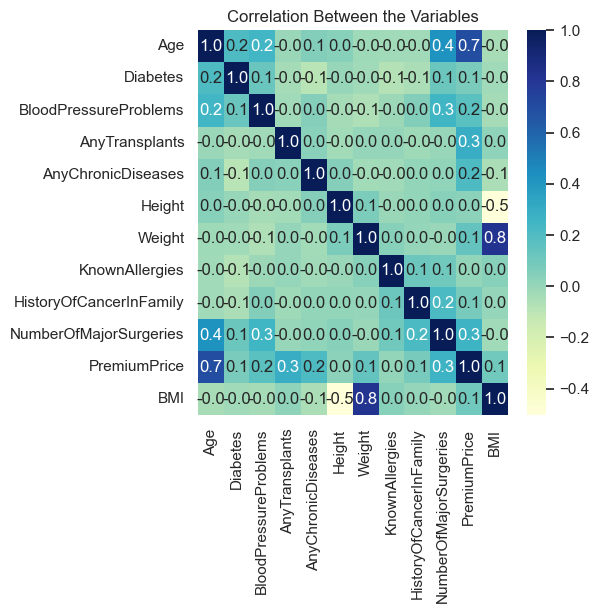

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(corr_mat, 
               annot=True, 
               fmt=".1f", 
               cmap="YlGnBu")
ax.set_title('Correlation Between the Variables')
plt.show()


From the correlation heat map, there is a strong correlation between:

i.   BMI and weight

ii.  Number of major surgeries and age

iii. Age and the premium price

iv.  Number of transplant to premium price

v.   Blood pressure problems and number of major surgeries

vi.  Number of major surgeries and premium price

Among the correlation in the above list, **age and premium price** is more significant to this datasets. So, let's visualise the relationship between age and premium price!

<a id="python"></a>

<img src="https://static01.nyt.com/images/2023/06/18/business/18Retiring-illo/18Retiring-illo-superJumbo.jpg" style="width:370px;height:300px;">

5. Assigning label to the price range

In [32]:
label=['Basic','Booster','Premier','Supreme']
df['Label']=pr_bins=pd.cut(df['PremiumPrice'],bins=4,labels=label,precision=0)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status,Label
0,45,0,0,0,0,155,57,0,0,0,25000,23.7,Normal,Booster
1,60,1,0,0,0,180,73,0,0,0,29000,22.5,Normal,Premier
2,36,1,1,0,0,158,59,0,0,1,23000,23.6,Normal,Booster
3,52,1,1,0,1,183,93,0,0,2,28000,27.8,Overweight,Premier
4,38,0,0,0,1,166,88,0,0,1,23000,31.9,Obese,Booster


In [33]:
column1 = df.pop('Label') 
df.insert(11, 'Label', column1) 
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Label,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Booster,23.7,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Premier,22.5,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Booster,23.6,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Premier,27.8,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,Booster,31.9,Obese


6. Assigning age categories 

In [34]:
agelabel=['Young','Adult','Senior']
df['AgeLabel']=pr_bins=pd.cut(df['Age'],bins=3,labels=agelabel,precision=0)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Label,BMI,BMI_Status,AgeLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Booster,23.7,Normal,Adult
1,60,1,0,0,0,180,73,0,0,0,29000,Premier,22.5,Normal,Senior
2,36,1,1,0,0,158,59,0,0,1,23000,Booster,23.6,Normal,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,Premier,27.8,Overweight,Senior
4,38,0,0,0,1,166,88,0,0,1,23000,Booster,31.9,Obese,Adult


In [35]:
column2 = df.pop('AgeLabel') 
df.insert(1, 'AgeLabel', column2) 
df.head()

,Age,AgeLabel,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Label,BMI,BMI_Status
0,45,Adult,0,0,0,0,155,57,0,0,0,25000,Booster,23.7,Normal
1,60,Senior,1,0,0,0,180,73,0,0,0,29000,Premier,22.5,Normal
2,36,Adult,1,1,0,0,158,59,0,0,1,23000,Booster,23.6,Normal
3,52,Senior,1,1,0,1,183,93,0,0,2,28000,Premier,27.8,Overweight
4,38,Adult,0,0,0,1,166,88,0,0,1,23000,Booster,31.9,Obese


7. Visualising Age vs. Premium price

<a id="age"></a>

[Text(0.5, 1.0, 'Age Vs Premium Price')]

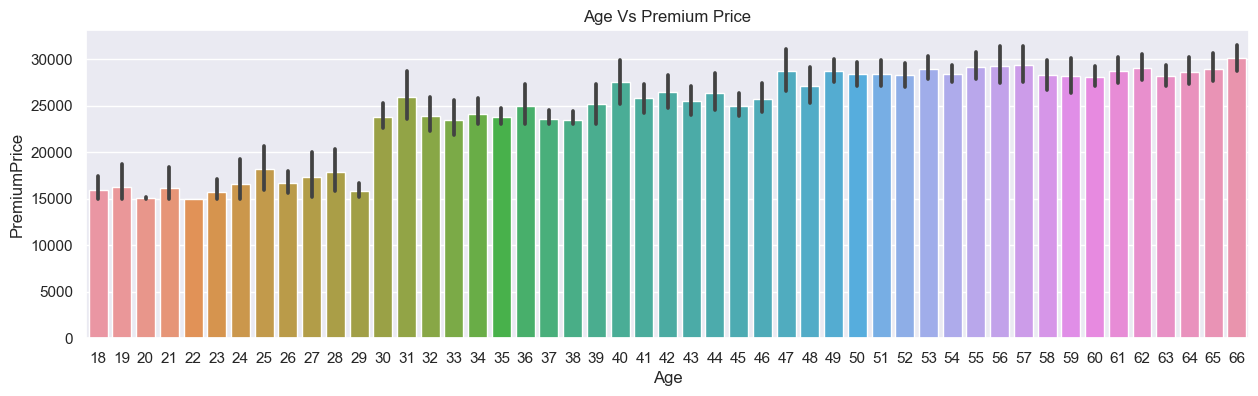

In [36]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.barplot(x='Age',y='PremiumPrice',data = df).set(title='Age Vs Premium Price')

<a id="agelabel"></a>

[Text(0.5, 1.0, 'Age Label Vs Premium Price')]

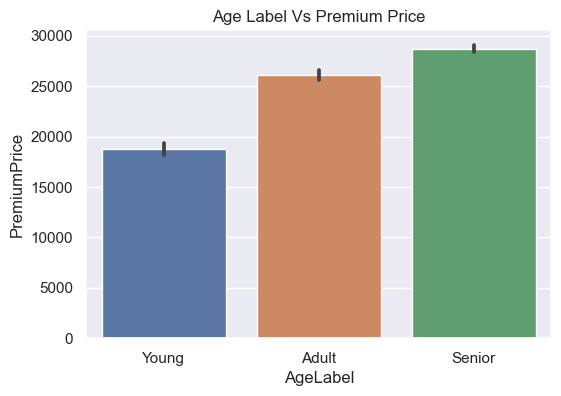

In [37]:
sns.barplot(x='AgeLabel',y='PremiumPrice',data = df).set(title='Age Label Vs Premium Price')

In [38]:
df[['Age', 'PremiumPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


<Axes: xlabel='PremiumPrice', ylabel='Density'>

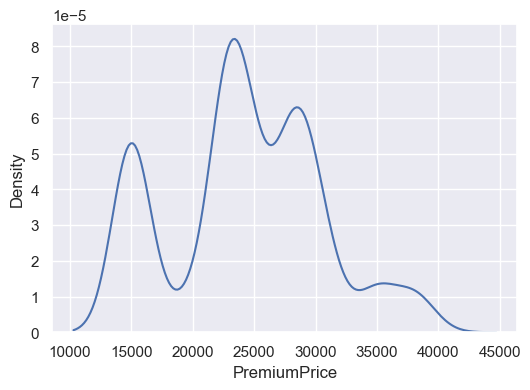

In [39]:
sns.kdeplot(df.PremiumPrice)

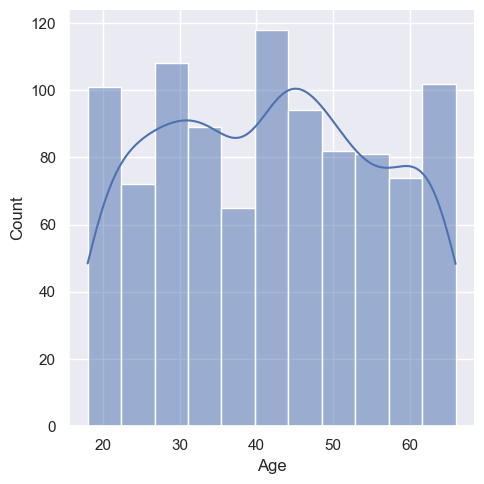

In [40]:
sns.displot(x='Age',data=df,kde=True)

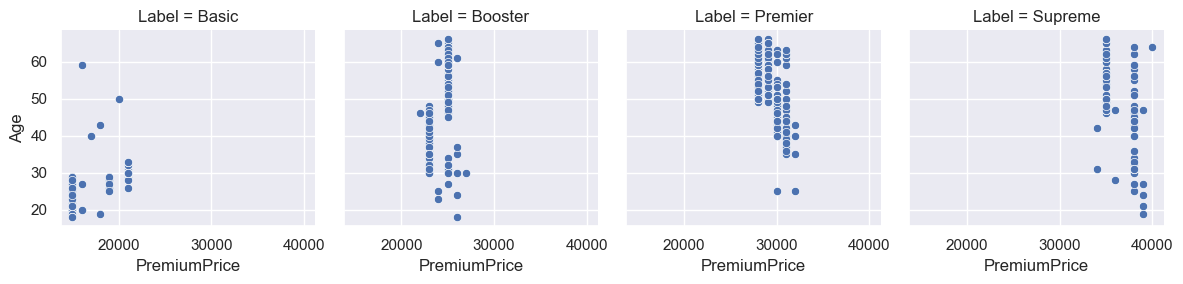

In [41]:
ax = sns.FacetGrid(df, col = 'Label')
ax.map(sns.scatterplot, 'PremiumPrice', 'Age')
ax.set
plt.show()

<Axes: xlabel='Label', ylabel='count'>

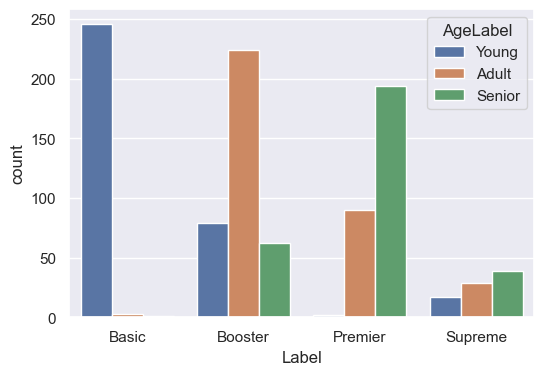

In [42]:
sns.countplot(x='Label',hue='AgeLabel',data=df)

<Axes: xlabel='BMI_Status', ylabel='count'>

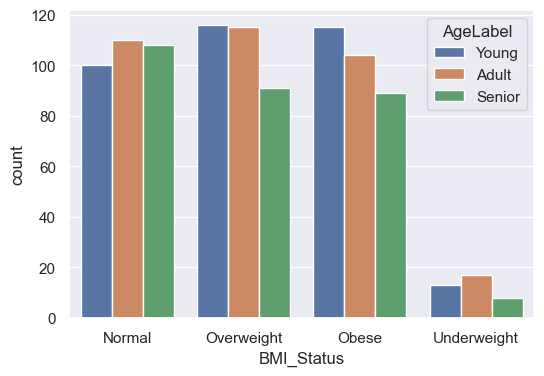

In [43]:
sns.countplot(x='BMI_Status',hue='AgeLabel',data=df)

# 4.0 Modeling

I'm dropping the non-numerical columns

In [51]:
y = df.PremiumPrice.values
X = df.drop(['PremiumPrice','AgeLabel','Label','BMI_Status'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [53]:
models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(), 
          "Random Forest": RandomForestClassifier(), 
          "K-Neighbors": KNeighborsClassifier()}

In [54]:
accuracies ={}

In [55]:
def train_and_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    acc = model.score (X_test,y_test)*100
    accuracies [name] = acc
    print("Test Accuracy: {:.2f}%".format(acc))
for name, model in models.items():
    print (f"Model: {name}") 
    train_and_evaluate_model (name, model, X_train, y_train, X_test, y_test) 
    print("\n")

Model: Logistic Regression
Test Accuracy: 67.17%


Model: Decision Tree
Test Accuracy: 88.38%


Model: Random Forest


C:\Users\shant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 91.41%


Model: K-Neighbors
Test Accuracy: 51.52%




### 4.1 Explain the modeling technique to solve the problem, including choice of model and parameters

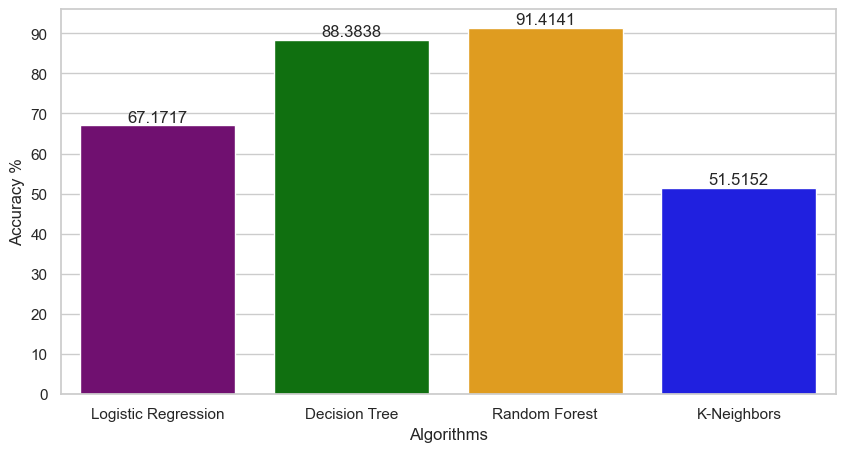

In [56]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    ax.bar_label(i,) #function2
plt.show()

In [60]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_head_lr)

C:\Users\shant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_head_lr = lr.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_rf = rf.predict(X_test)
y_head_knn = knn.predict(X_test)


1. Testing accuracy of model

In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_head_rf))

0.6718984492246123


- Random Forest Classifier shows >67% accuracy

In [ ]:
# cm_lr = confusion_matrix(y_test,y_head_lr)
# cm_dtc = confusion_matrix(y_test,y_head_dtc)
# cm_rf = confusion_matrix(y_test,y_head_rf)
# cm_knn = confusion_matrix(y_test,y_head_knn)
# def plot_confusion_matrix(model, X_test, y_test):
#     y_head = model.predict(X_test)
#     cm = confusion_matrix(y_test, y_head)
#     sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# plt.figure(figsize=(10,12)) 
# plt.suptitle("Confusion Matrices", fontsize=24) 
# plt.subplots_adjust (wspace = 0.4, hspace= 0.4)
# for i, (name, model) in enumerate (models.items(), 1):
#     plt.subplot(2, 2, i)
#     plt.title(name)
#     plot_confusion_matrix(model, X_test, y_test)

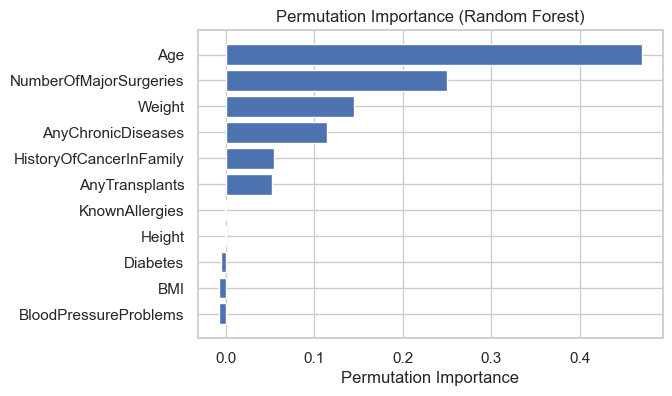

In [66]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)
feature_names = X_test.columns
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

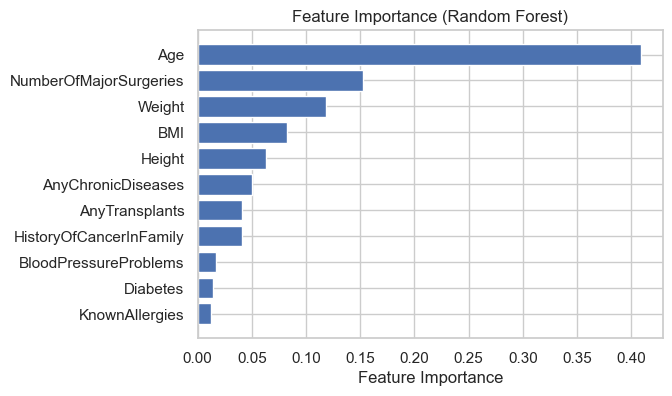

In [67]:
rf_feature_importances = rf_classifier.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

### 4.2 Explain the insights and results obtained

From the bar plot above, we can see that highest accuracies score were shown in Random Forest Classifier. Therefore, random forest classifier is best fit model to predict the premium price for health insurance. 

The prediction when using 80% data for training and 20% for testing turnout to be 90% using Random Forest technique.

# 5.0 Evaluation and Recommendations

### 5.1 Evaluation of the model using appropriate metrics 

- using Number of Surgeries, Age and Weight as next feature because it shows higher correlation.

In [68]:
y = df.PremiumPrice.values
X = df.loc[:,['NumberOfMajorSurgeries','Age','Weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [69]:
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(random_state=42) 
rf_classifier.fit(X_train, y_train) 
y_pred = rf_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


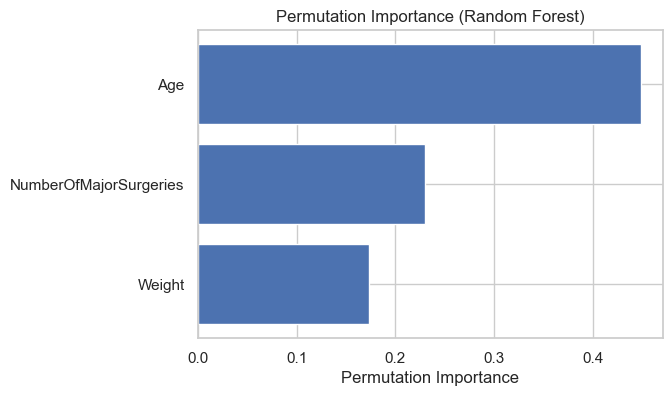

In [70]:
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)
feature_names = X_test.columns
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()


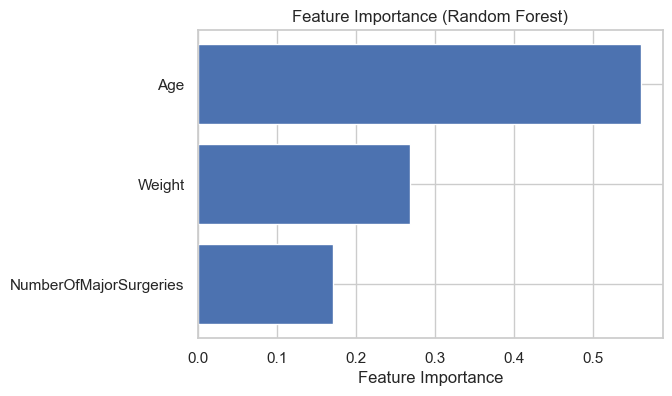

In [72]:
rf_feature_importances = rf_classifier.feature_importances_
sorted_idx_rf = rf_feature_importances.argsort()
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

The prediction when using 80% data for training and 20% for testing turnout to be **79%** using Random Forest technique with the important features were selected.

### 5.2 Provide the recommendations according to the initial problem statement.


### Recommendation

1. Dataset could add more variables like diet, allergies and physical exercise.
2. Add more descriptive variable like the frequency of surgeries, hospital admission, claiming of insurance and so on.


### Conclusion

From the EDA, we can observe that when the *age increases*, the *amount of money one pays for insurance also increases*. 
[Age](#age)
[Age](#agelabel)

This can be explain with the fact that increasing age influences more illness onto a person.
[Diabetes](#diabetes)
[Blood Pressure](#bp)

And also people those who have done a transplantation pays higher premium than those who have not done any transplantation [Transplants](#Transplants)

Moreover, those who are obese pays more than others. [BMI](#obese)
With this, the public should do early health screening and buy health insurance in early age. People should also try to be active by walking or exercising to maintain good health. 
